In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
object_columns=df.select_dtypes(['object']).columns
df[object_columns]=df[object_columns].apply(lambda x: x.astype('category'))
cat_columns=df.select_dtypes(['category']).columns
df[cat_columns]=df[cat_columns].apply(lambda x: x.cat.codes)

In [5]:
df['area_log']= np.log(df.area +1)


In [6]:
df['area_bins'] = pd.qcut(df['area_log'],2, labels=[0,1])
df.drop(['area','area_log'],axis=1,inplace=True)

In [7]:
y=df.pop('area_bins')
X=df

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: area_bins, Length: 517, dtype: category
Categories (2, int64): [0 < 1]

In [9]:
RS=123
time_start = time.time()
fashion_tsne_2d = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.000s...
[t-SNE] Computed neighbors for 517 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 257.285828
[t-SNE] KL divergence after 500 iterations: 0.177266
t-SNE Time elapsed: 0.6446149349212646 seconds


In [10]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [11]:

RS=123
def fashion_scatter_2d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(24, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

<IPython.core.display.Javascript object>


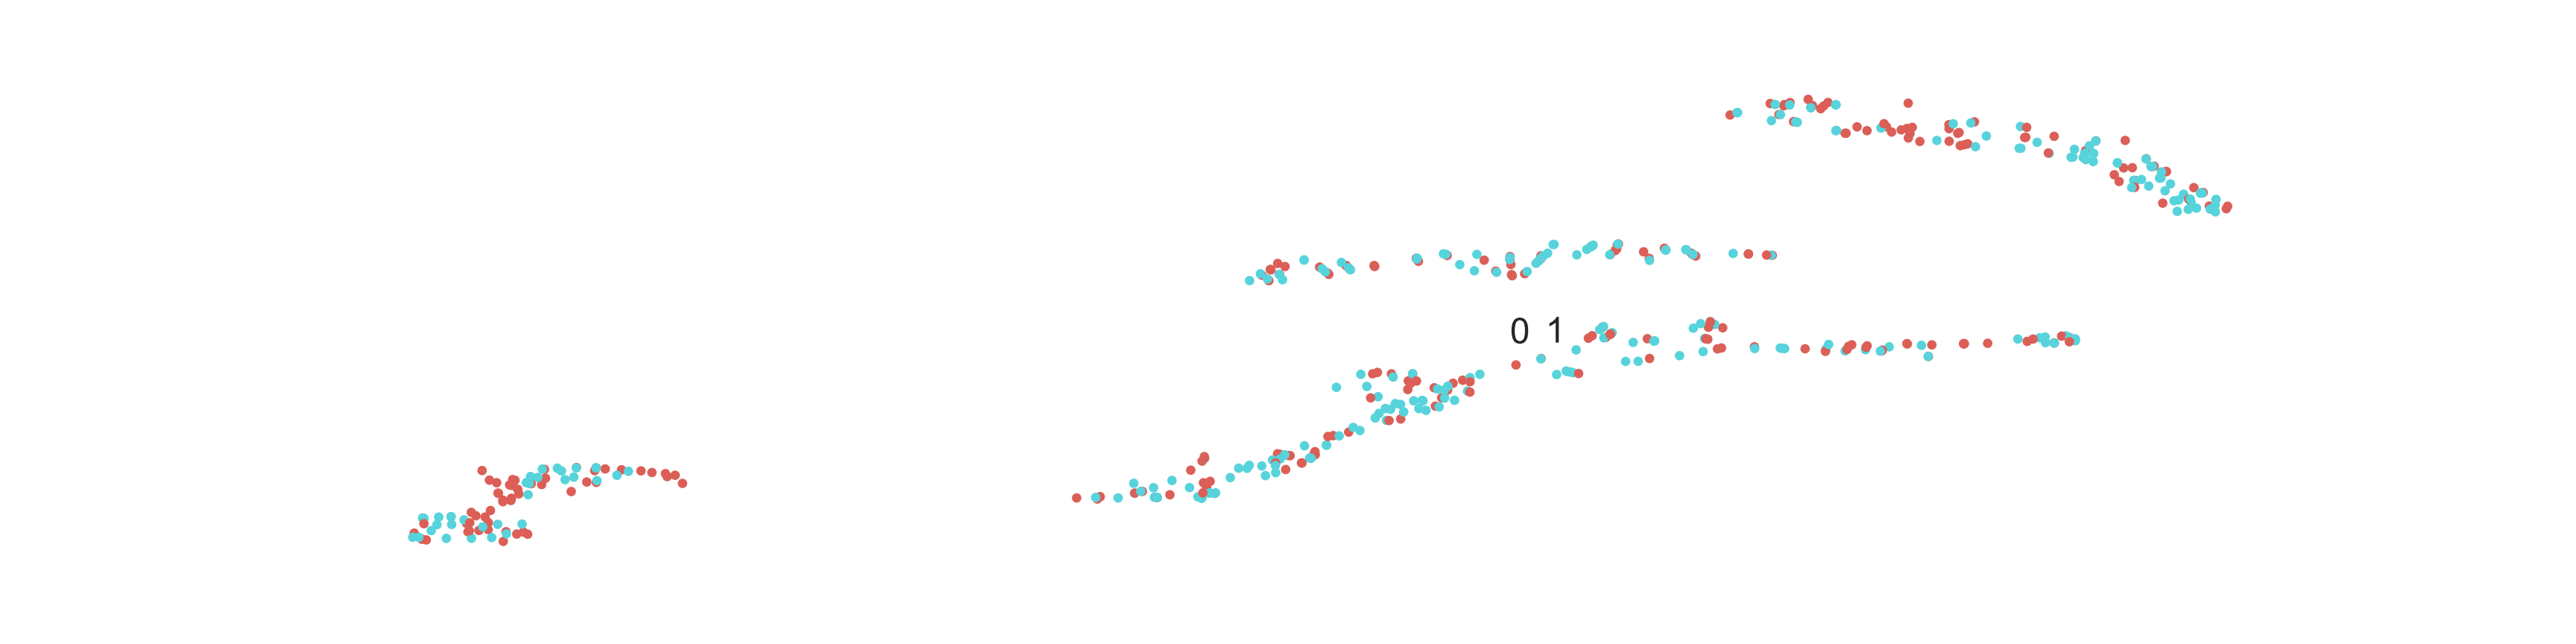

(<Figure size 1728x432 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.39586335, -1.1037307, '0'), Text(0.51139, -1.0212464, '1')])

In [12]:
%matplotlib notebook
fashion_scatter_2d(fashion_tsne_2d, y)

In [13]:
time_start = time.time()
fashion_tsne_3d = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time : {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 368.438812
[t-SNE] KL divergence after 500 iterations: 2.642489
t-SNE Time : 1.2280216217041016 seconds


In [14]:
import matplotlib.animation as animation
from numpy.random import normal as normal


In [17]:
fashion_tsne_3d.shape

(517, 3)

In [18]:
len(fashion_tsne_3d[0])

3

In [19]:
fashion_tsne_3d[:,0].shape

(517,)

In [21]:
len(fashion_tsne_3d[:,2])

517

In [23]:
def fashion_scatter_3d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot(111, projection='3d')
    sc = ax.scatter(x[:,0], x[:,1],x[:,2], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    ax.axis('off')
    ax.axis('tight')


    return f, ax, sc

<IPython.core.display.Javascript object>


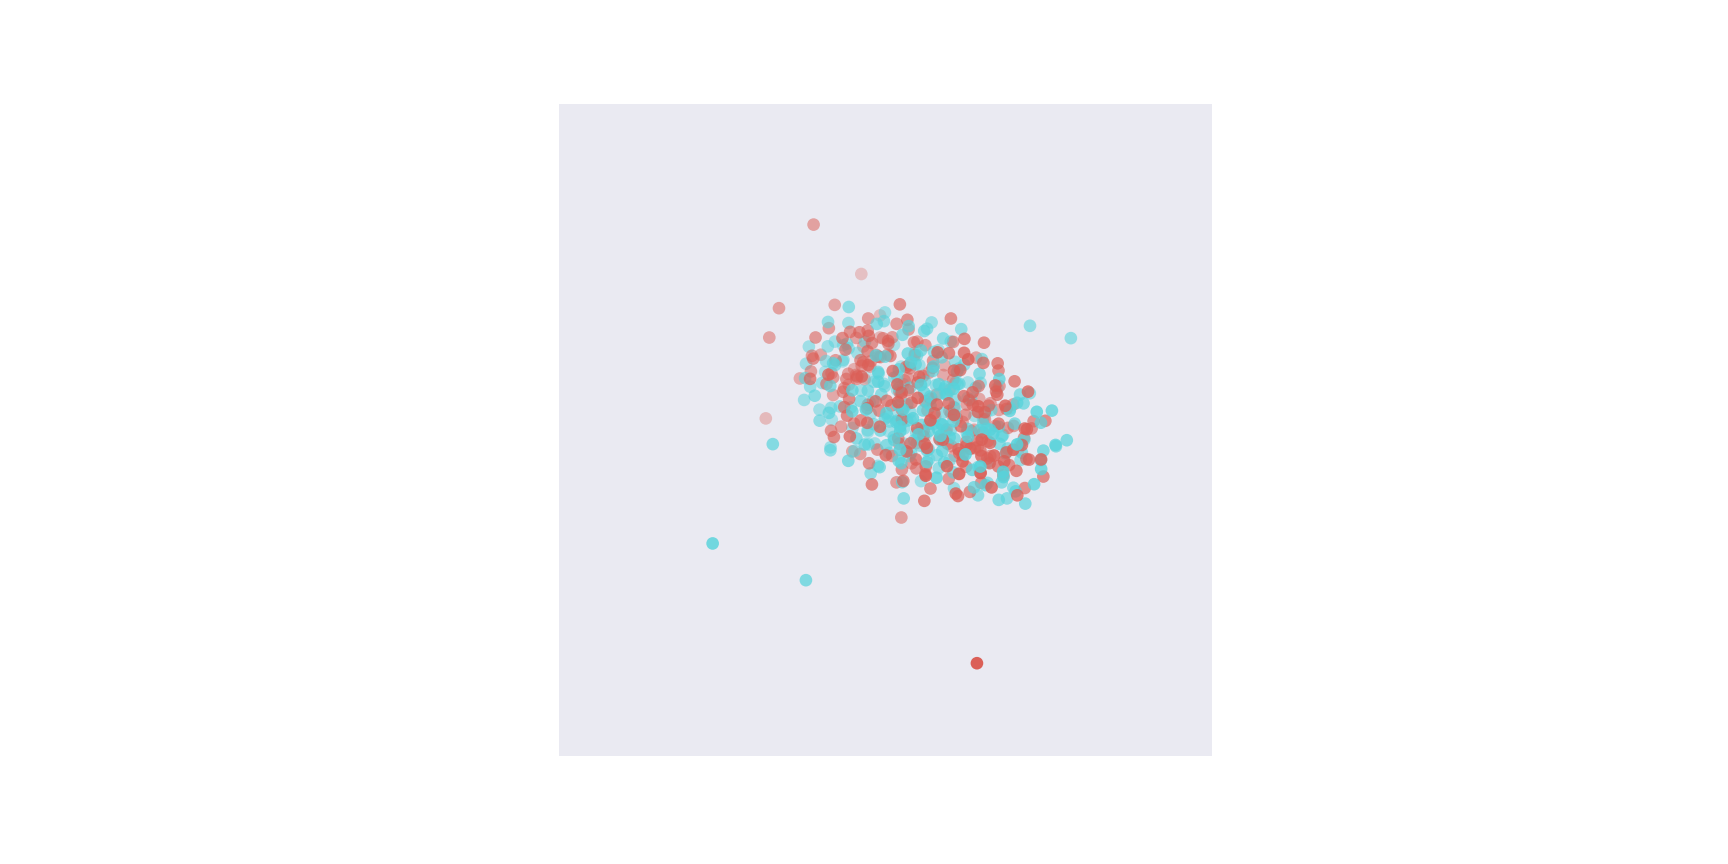

(<Figure size 864x432 with 1 Axes>,
 <Axes3DSubplot:>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x12be3d100>)

In [24]:
fashion_scatter_3d(fashion_tsne_3d, y)

In [28]:
fashion_tsne_3d.shape

(517, 3)

# Animation:

In [29]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter,
                      n_iter_check=1, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, verbose=0, args=None, kwargs=None):
    
    
    # The documentation of this function can be found in scikit-learn's code.
    if args is None:
        args = []
    if kwargs is None:
        kwargs = {}

    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(float).max
    best_error = np.finfo(float).max
    best_iter = i = it

    tic = time()
    for i in range(it, n_iter):
        
        positions.append(p.copy())

        check_convergence = (i + 1) % n_iter_check == 0
        # only compute the error when needed
        kwargs['compute_error'] = check_convergence or i == n_iter - 1

        error, grad = objective(p, *args, **kwargs)
        grad_norm = linalg.norm(grad)

        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

        if check_convergence:
            toc = time()
            duration = toc - tic
            tic = toc

            if verbose >= 2:
                print("[t-SNE] Iteration %d: error = %.7f,"
                      " gradient norm = %.7f"
                      " (%s iterations in %0.3fs)"
                      % (i + 1, error, grad_norm, n_iter_check, duration))

            if error < best_error:
                best_error = error
                best_iter = i
            elif i - best_iter > n_iter_without_progress:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: did not make any progress "
                          "during the last %d episodes. Finished."
                          % (i + 1, n_iter_without_progress))
                break
            if grad_norm <= min_grad_norm:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: gradient norm %f. Finished."
                          % (i + 1, grad_norm))
                break

    return p, error, i


In [30]:
from time import time
from scipy import linalg
import sklearn


In [31]:
sklearn.manifold._t_sne._gradient_descent = _gradient_descent


In [32]:
x_test=TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 257.285828
[t-SNE] KL divergence after 500 iterations: 0.177266


In [33]:
print(len(positions),len(positions[0]))

500 1034


In [34]:
X_iter = np.dstack(position.reshape(-1, 2) for position in positions)

<ipython-input-34-15ebe9eb4bc9>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_iter = np.dstack(position.reshape(-1, 2) for position in positions)


In [35]:
print(len(X_iter),len(X_iter[0]), len(X_iter[0][0]))

517 2 500


In [36]:
X_iter

array([[[-1.08563065e-04,  4.89471108e-03, -1.89029396e-01, ...,
         -2.37373581e+01, -2.37511559e+01, -2.37603931e+01],
        [ 9.97345414e-05, -6.11413270e-03,  2.51533866e-01, ...,
         -1.60638103e+01, -1.60907745e+01, -1.61063900e+01]],

       [[ 2.82978490e-05, -1.41737622e-03,  5.18845506e-02, ...,
          6.59855556e+00,  6.60540915e+00,  6.61329222e+00],
        [-1.50629465e-04,  7.32692378e-03, -2.53101677e-01, ...,
          2.46135635e+01,  2.46402187e+01,  2.46602612e+01]],

       [[-5.78600229e-05,  2.72595743e-03, -1.04868062e-01, ...,
          7.32039738e+00,  7.33015537e+00,  7.33572435e+00],
        [ 1.65143647e-04, -6.72147097e-03,  2.42336422e-01, ...,
          2.45156879e+01,  2.45345726e+01,  2.45490837e+01]],

       ...,

       [[-7.35396752e-05,  2.64201360e-03, -8.52132365e-02, ...,
          5.37737226e+00,  5.39163303e+00,  5.40923548e+00],
        [ 1.86429606e-05, -1.00154046e-03,  4.67848331e-02, ...,
          2.37604542e+01,  2.37721

In [39]:
X_iter[...,0][...,0] # x coords for the first iteration

array([-1.08563065e-04,  2.82978490e-05, -5.78600229e-05, -2.42667913e-04,
        1.26593615e-04, -6.78886136e-05,  1.49138956e-04, -4.43981917e-05,
        2.20592992e-04,  1.00405392e-04,  7.37368537e-05, -9.35833814e-05,
       -1.25388062e-04,  9.07105205e-05, -1.40068723e-05, -2.55619379e-05,
       -1.77153313e-04,  9.27462461e-05,  2.84591579e-07, -8.79536310e-05,
       -8.05366508e-05, -3.90899804e-05,  3.38589016e-05,  2.39236513e-04,
        9.78735989e-05, -1.29408523e-04,  1.74371220e-04,  2.96832286e-06,
        8.90706433e-05,  1.49564410e-04, -7.72708663e-05,  3.14271965e-05,
        1.41729906e-04,  4.54900828e-06, -1.19830118e-04,  4.68439102e-05,
        1.16220399e-04, -2.12310028e-04, -4.03366030e-05, -8.37516709e-05,
        1.25523729e-04,  1.66095240e-04, -3.14758145e-05, -7.32461995e-05,
        2.08711339e-04,  1.15020550e-04,  1.81035120e-05, -3.35010773e-05,
       -1.08456785e-04,  3.79400590e-05,  6.42054656e-05,  7.12264664e-05,
       -2.46259810e-06,  

In [40]:
X_iter[...,0][...,1] #y coords for the first iteration

array([ 9.97345414e-05, -1.50629465e-04,  1.65143647e-04, -4.28912645e-05,
       -8.66740374e-05, -9.47089666e-06, -6.38901984e-05, -4.34351241e-05,
        2.18678615e-04,  3.86186366e-05,  1.49073210e-04,  1.17582902e-04,
       -6.37751509e-05, -1.42868055e-04, -8.61754888e-05, -2.79858883e-04,
       -6.99877273e-05, -1.73635672e-05,  6.88222717e-05,  2.83627323e-05,
       -1.72766944e-04,  5.73805846e-05, -1.18304945e-06,  4.12912159e-05,
        2.23814335e-04, -1.03878818e-04, -7.98062756e-05,  1.06931591e-04,
        1.75488603e-04,  1.06939267e-04,  7.94862644e-05, -1.32626548e-04,
        8.07236502e-05, -2.33092051e-05,  1.99524075e-05, -8.31154975e-05,
       -1.09720298e-04,  1.03972707e-04, -1.26029581e-05, -1.60596275e-04,
       -6.88868968e-05,  8.07308170e-05, -1.08590240e-04, -1.21252306e-04,
        1.64441226e-05, -1.26735205e-04,  1.17786192e-04,  1.03111444e-04,
       -1.36347153e-04, -3.79176417e-05, -1.97788788e-04,  2.59830384e-04,
        3.41421287e-06, -

In [71]:
x_test

array([[-23.767986 , -16.115124 ],
       [  6.6217   ,  24.677042 ],
       [  7.340987 ,  24.563444 ],
       ...,
       [  5.427627 ,  23.804956 ],
       [ -1.4195732,  -5.2533293],
       [-26.69014  , -14.840844 ]], dtype=float32)

In [83]:
X_iter[...,0]

array([[-1.08563065e-04,  9.97345414e-05],
       [ 2.82978490e-05, -1.50629465e-04],
       [-5.78600229e-05,  1.65143647e-04],
       ...,
       [-7.35396752e-05,  1.86429606e-05],
       [ 1.08464301e-04,  1.19118929e-04],
       [ 3.59687037e-05, -3.64357184e-05]], dtype=float32)

## 2D Animation:

<IPython.core.display.Javascript object>


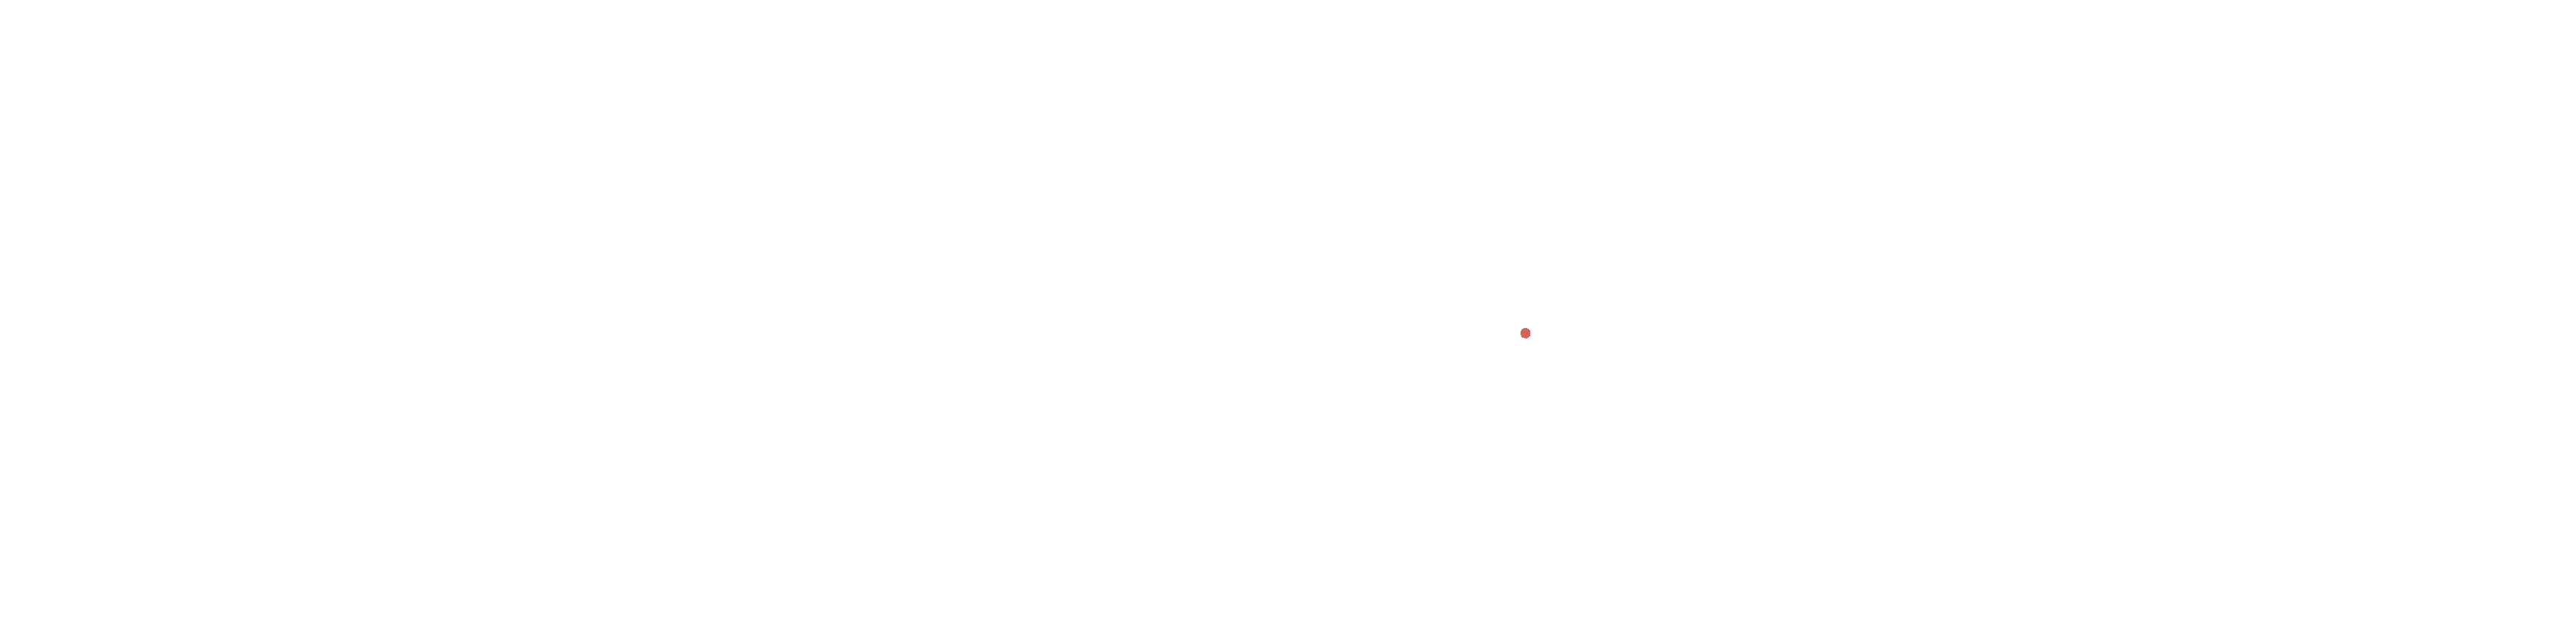

In [86]:
# choose a color palette with seaborn.
num_classes = len(np.unique(y))
palette = np.array(sns.color_palette("hls", num_classes))

nfr = 500 # Number of frames
fps = 10 # Frame per sec

# create a scatter plot.
f = plt.figure(figsize=(24, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(x_test[...,0], x_test[...,1], lw=0, s=40, c=palette[y.astype(np.int)])


#update function 
def update_test(i,sc,X_iter):
    x=X_iter[..., i]
    sc.set_offsets(x)
    return sc


plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
anime = animation.FuncAnimation(f, update_test, nfr,fargs=(sc,X_iter),interval=1000/fps)

In [47]:
x_3d = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 368.438812
[t-SNE] KL divergence after 500 iterations: 2.642489


In [48]:
x_3d.shape

(517, 3)

In [51]:
x_3d

array([[-40.79756  , -16.480923 ,  54.32111  ],
       [ 16.94148  , -49.6069   , -47.95161  ],
       [ 13.9768715,  47.356777 , -40.07408  ],
       ...,
       [-15.431214 ,  48.23681  , -22.184721 ],
       [-34.38866  , -31.032585 ,   2.5286026],
       [-26.671848 , -15.2305765,  62.010662 ]], dtype=float32)

In [54]:
positions[-500:][0].shape

(1551,)

In [56]:
positions_3d = positions[-500:] #for some weird reason there are 500 rows of 2d and 500 of 3d values, so removing first half of 2d values

In [57]:
X_iter_3d = np.dstack(position.reshape(-1, 3) for position in positions_3d)

<ipython-input-57-77b1e1fffe15>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_iter_3d = np.dstack(position.reshape(-1, 3) for position in positions_3d)


In [58]:
X_iter_3d.shape

(517, 3, 500)

In [67]:
X_iter_3d

array([[[-1.08563065e-04,  5.34822466e-03, -1.72648445e-01, ...,
         -4.05039558e+01, -4.06015625e+01, -4.06994209e+01],
        [ 9.97345414e-05, -2.26386636e-03,  4.87249866e-02, ...,
         -1.64278393e+01, -1.64455872e+01, -1.64632893e+01],
        [ 2.82978490e-05, -8.23961163e-04,  1.12557011e-02, ...,
          5.38442612e+01,  5.40033836e+01,  5.41623535e+01]],

       [[-1.50629465e-04,  4.82270401e-03, -1.20329946e-01, ...,
          1.67798443e+01,  1.68341141e+01,  1.68879948e+01],
        [-5.78600229e-05,  1.32477633e-03, -3.61345448e-02, ...,
         -4.94319344e+01, -4.94915695e+01, -4.95498619e+01],
        [ 1.65143647e-04, -5.28711453e-03,  1.28353655e-01, ...,
         -4.74474564e+01, -4.76172409e+01, -4.77852669e+01]],

       [[-2.42667913e-04,  8.92487727e-03, -2.55558759e-01, ...,
          1.39879837e+01,  1.39845963e+01,  1.39808941e+01],
        [-4.28912645e-05,  8.56587547e-04, -2.54217368e-02, ...,
          4.69930916e+01,  4.71139870e+01,  4.723

In [68]:
X_iter_3d[...,0] #xyz coords for iteration 0... there are 500 such iterations 

array([[-1.08563065e-04,  9.97345414e-05,  2.82978490e-05],
       [-1.50629465e-04, -5.78600229e-05,  1.65143647e-04],
       [-2.42667913e-04, -4.28912645e-05,  1.26593615e-04],
       ...,
       [ 1.09067732e-04,  6.91743844e-05, -1.21793673e-04],
       [ 1.28559172e-04, -1.09078443e-04,  1.99611031e-06],
       [-4.80100607e-05, -9.23415137e-05,  1.16794057e-04]], dtype=float32)

In [69]:
X_iter_3d[...,0][:,0] #xcords for iteration 0

array([-1.08563065e-04, -1.50629465e-04, -2.42667913e-04, -8.66740374e-05,
        1.49138956e-04, -4.34351241e-05,  1.00405392e-04,  1.49073210e-04,
       -1.25388062e-04, -1.42868055e-04, -2.55619379e-05, -6.99877273e-05,
        2.84591579e-07,  2.83627323e-05, -3.90899804e-05, -1.18304945e-06,
        9.78735989e-05, -1.03878818e-04,  2.96832286e-06,  1.75488603e-04,
       -7.72708663e-05, -1.32626548e-04,  4.54900828e-06,  1.99524075e-05,
        1.16220399e-04,  1.03972707e-04, -8.37516709e-05, -6.88868968e-05,
       -3.14758145e-05, -1.21252306e-04,  1.15020550e-04,  1.17786192e-04,
       -1.08456785e-04, -3.79176417e-05,  7.12264664e-05,  3.41421287e-06,
        4.26146617e-05,  1.24286948e-04,  1.01273901e-04, -3.32475283e-05,
       -2.75786006e-05,  7.48215607e-05,  8.12341314e-05, -5.63923932e-05,
       -7.56437148e-05,  3.23468812e-05,  1.51886561e-04,  1.30214958e-05,
        5.56548694e-05,  1.54454436e-04,  2.53816470e-05, -1.87686863e-04,
        5.53856189e-05, -

## 3D Animation:

<IPython.core.display.Javascript object>


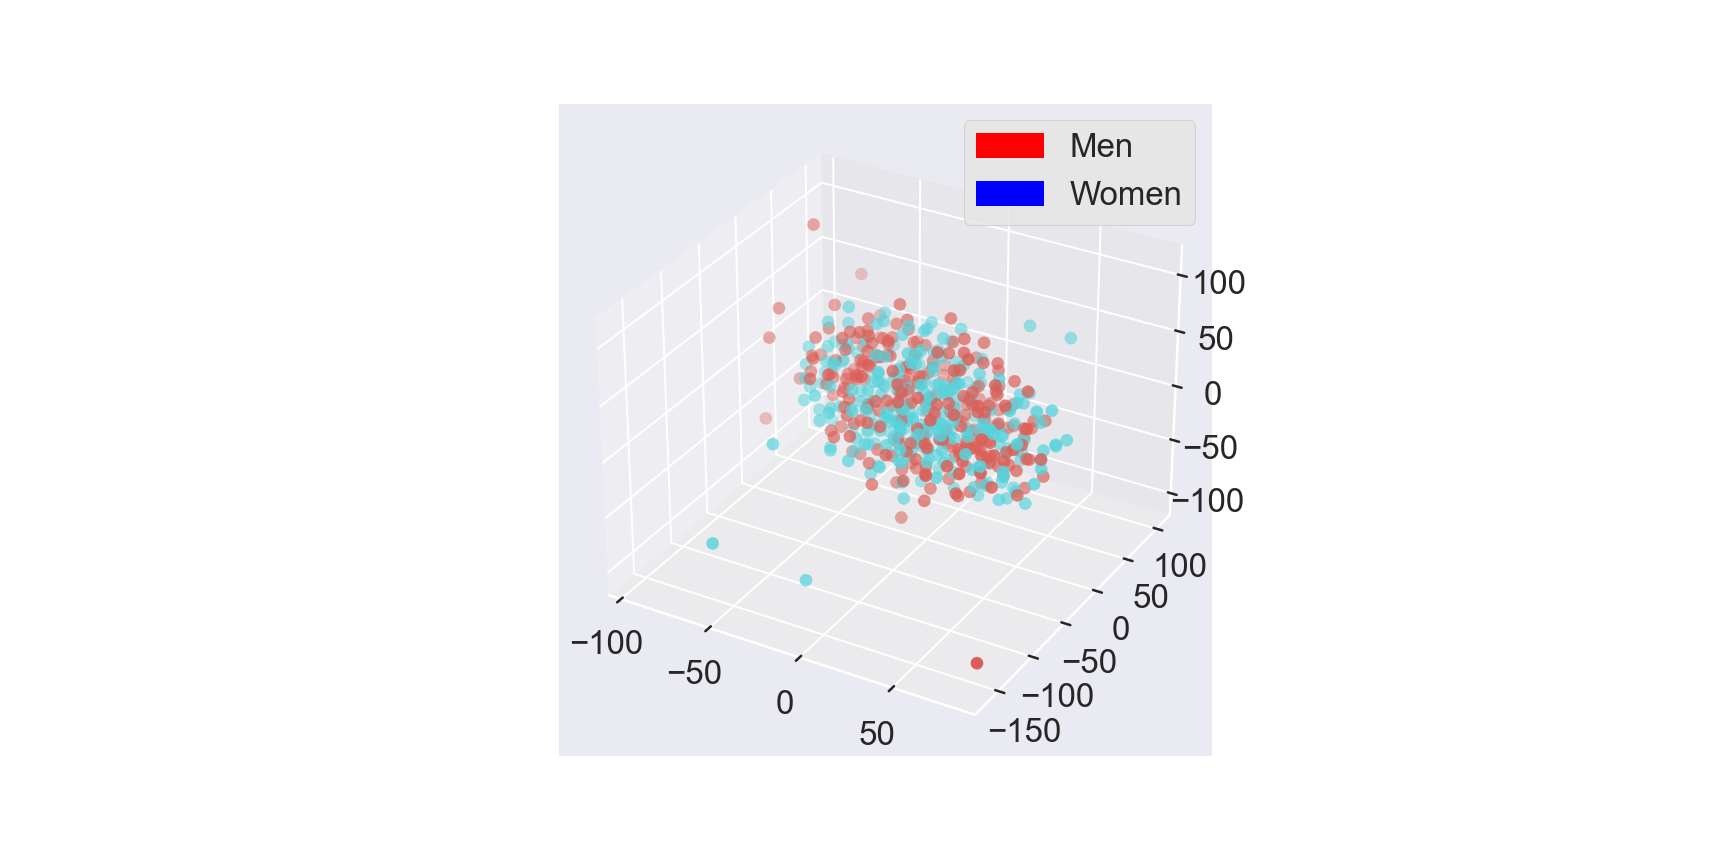

In [70]:
# choose a color palette with seaborn.
num_classes = len(np.unique(y))
palette = np.array(sns.color_palette("hls", num_classes))



nfr = 500 # Number of frames
fps = 10 # Frame per sec


# create a scatter plot.
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot(111, projection='3d')
sc = ax.scatter(x_3d[...,0], x_3d[...,1],x_3d[...,2], lw=0, s=40, c=palette[y.astype(np.int)])

#plt.xlim(-15, 15)
#plt.ylim(-15, 15)
#ax.axis('off')
#ax.axis('tight')




animmi = animation.FuncAnimation(f, update, nfr,fargs=(X_iter_3d,sc),interval=1000/fps)

def update(i,X_iter_3d,scat):
    
    x = X_iter_3d[...,i][:,0] 
    y = X_iter_3d[...,i][:,1]
    z = X_iter_3d[...,i][:,2] 
    
    scat._offsets3d = (x,y,z)
    return scat